
 ## **Predicting A Tennis Match Outcome Based On Player Rank Points, Rank and Number Of Aces.**
 
### **Introduction** 
    The Association of Tennis Professionals (ATP) uses a computer ranking system to determine who can enter their tournaments and provide an unbiased analysis of the performance of the tennis players.The tennis match data was originally collected by the Association of Tennis Professionals, and were compiled into datasets by Jeff Sackmann, which we will be using. While the data includes statistics from all ATP matches since 1968, we will only be using the most relevant data from the past ten years (2014-2023). Our project will be answering the question of how a tennis player's rank points, rank, and number of aces in a match can be used to predict their likelihood of winning a tennis match. Our main argument is that we believe that a tennis player will be more likely to win a match if they have higher rank points, a higher rank, and more aces than their competitor. Because rank points and rank are calculated based off of player performance in previous matches, we will predict that a higher rank, as well as higher rank points are likely to predict the outcome of a match as a win. Additionally, we predict that victory can also be predicted by a higher number of aces. Aces are a dominant type of round victory that is determined by the outcome of a single rally. We predict that a higher number of aces will reflect a more skilled player, and thus predict victory. 


(A note to the grader that the TA Eros gave us code for this proposal to help separate the data so there is a categorical variable in our dataset. He used a for loop to execute this and it takes **3-4 minutes to run**.)  

In [2]:
library(tidyverse)
library(tidymodels)
set.seed(1)
install.packages("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv', "data/data2014.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv', "data/data2015.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv', "data/data2016.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv', "data/data2017.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv', "data/data2018.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv', "data/data2019.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv', "data/data2020.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv', "data/data2021.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv', "data/data2022.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv', "data/data2023.csv")

In [4]:
data2014<- read_csv("data/data2014.csv")
data2015<- read_csv("data/data2015.csv")
data2016<- read_csv("data/data2016.csv")
data2017<- read_csv("data/data2017.csv")
data2018<- read_csv("data/data2018.csv")
data2019<- read_csv("data/data2019.csv")
data2020<- read_csv("data/data2020.csv")
data2021<- read_csv("data/data2021.csv")
data2022<- read_csv("data/data2022.csv")
data2023<- read_csv("data/data2023.csv")

Rows: 2901 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2943 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2941 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tou

However, our data set isn't tidy because the categorical factor of "win" or "loss" is integrated into every column. We first must combine the columns and extract the "win" or "loss" factor into a new column. 


In [5]:
gigadata <- rbind(data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022, data2023) 

glimpse(gigadata)


selected_gigadata<- select(gigadata, w_ace, l_ace, winner_rank_points, loser_rank_points, loser_rank, winner_rank, winner_ht, loser_ht, winner_age, loser_age, l_df, w_df )


Rows: 27,467
Columns: 49
$ tourney_id         <chr> "2014-339", "2014-339", "2014-339", "2014-339", "20…
$ tourney_name       <chr> "Brisbane", "Brisbane", "Brisbane", "Brisbane", "Br…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "Ha…
$ draw_size          <dbl> 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "…
$ tourney_date       <dbl> 20131229, 20131229, 20131229, 20131229, 20131229, 2…
$ match_num          <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …
$ winner_id          <dbl> 103813, 104594, 105023, 105032, 103917, 104871, 103…
$ winner_seed        <dbl> NA, NA, NA, NA, NA, 8, 6, NA, NA, 5, NA, NA, 1, NA,…
$ winner_entry       <chr> NA, NA, NA, "WC", NA, NA, NA, NA, "Q", NA, NA, NA, …
$ winner_name        <chr> "Jarkko Nieminen", "Marinko Matosevic", "Sam Querre…
$ winner_hand        <chr> "L", "R", "R", "R", "R", "R", "L", "R", "R", "R", "…
$ winner_ht    

In [6]:

w_gigadata<- select(selected_gigadata, w_ace, winner_rank_points, winner_rank, w_df, winner_age, winner_ht)
l_gigadata<- select(selected_gigadata, l_ace, loser_rank_points, loser_rank, l_df, loser_age, loser_ht)

glimpse(w_gigadata)


Rows: 27,467
Columns: 6
$ w_ace              <dbl> 5, 11, 18, 23, 15, 10, 13, 4, 31, 6, 14, 5, 9, 4, 1…
$ winner_rank_points <dbl> 1090, 774, 960, 307, 918, 1175, 1310, 780, 369, 152…
$ winner_rank        <dbl> 39, 61, 46, 172, 50, 34, 28, 60, 147, 23, 37, 68, 6…
$ w_df               <dbl> 3, 3, 1, 2, 4, 2, 3, 1, 2, 1, 7, 7, 0, 3, 7, 3, 2, …
$ winner_age         <dbl> 32.4, 28.3, 26.2, 26.1, 31.9, 26.8, 32.2, 32.8, 23.…
$ winner_ht          <dbl> 185, 194, 198, 193, 190, 188, 188, 180, 193, 188, 1…


In [7]:
w_gigadata<- mutate(w_gigadata, status = "win") |>
                mutate(status = as.factor(status)) |>
                rename("ace" = w_ace, "rank_points" = winner_rank_points, "rank" = winner_rank, "age" = winner_age, "height" = winner_ht, "dbl_fault" = w_df)
glimpse(w_gigadata)

l_gigadata<- mutate(l_gigadata, status = "loss") |>
                mutate(status = as.factor(status)) |>
                rename("ace" = l_ace, "rank_points" = loser_rank_points, "rank" = loser_rank, "age" = loser_age, "height" = loser_ht, "dbl_fault" = l_df)
glimpse(l_gigadata)

Rows: 27,467
Columns: 7
$ ace         <dbl> 5, 11, 18, 23, 15, 10, 13, 4, 31, 6, 14, 5, 9, 4, 18, 10, …
$ rank_points <dbl> 1090, 774, 960, 307, 918, 1175, 1310, 780, 369, 1520, 1130…
$ rank        <dbl> 39, 61, 46, 172, 50, 34, 28, 60, 147, 23, 37, 68, 6, 61, 1…
$ dbl_fault   <dbl> 3, 3, 1, 2, 4, 2, 3, 1, 2, 1, 7, 7, 0, 3, 7, 3, 2, 0, 4, 1…
$ age         <dbl> 32.4, 28.3, 26.2, 26.1, 31.9, 26.8, 32.2, 32.8, 23.2, 22.6…
$ height      <dbl> 185, 194, 198, 193, 190, 188, 188, 180, 193, 188, 198, 188…
$ status      <fct> win, win, win, win, win, win, win, win, win, win, win, win…
Rows: 27,467
Columns: 7
$ ace         <dbl> 9, 14, 4, 5, 13, 4, 4, 8, 4, 2, 8, 4, 1, 19, 8, 12, 8, 2, …
$ rank_points <dbl> 425, 1160, 1244, 549, 697, 784, 721, 41, 310, 977, 965, 39…
$ rank        <dbl> 136, 35, 29, 100, 70, 59, 67, 628, 170, 43, 45, 142, 39, 4…
$ dbl_fault   <dbl> 7, 1, 0, 4, 2, 3, 2, 5, 1, 1, 2, 1, 4, 2, 6, 6, 8, 2, 1, 2…
$ age         <dbl> 21.9, 32.0, 31.0, 21.6, 26.3, 25.5, 26.0, 17.7, 25.2

In [8]:
new_data<- rbind(w_gigadata, l_gigadata)
glimpse(new_data)

Rows: 54,934
Columns: 7
$ ace         <dbl> 5, 11, 18, 23, 15, 10, 13, 4, 31, 6, 14, 5, 9, 4, 18, 10, …
$ rank_points <dbl> 1090, 774, 960, 307, 918, 1175, 1310, 780, 369, 1520, 1130…
$ rank        <dbl> 39, 61, 46, 172, 50, 34, 28, 60, 147, 23, 37, 68, 6, 61, 1…
$ dbl_fault   <dbl> 3, 3, 1, 2, 4, 2, 3, 1, 2, 1, 7, 7, 0, 3, 7, 3, 2, 0, 4, 1…
$ age         <dbl> 32.4, 28.3, 26.2, 26.1, 31.9, 26.8, 32.2, 32.8, 23.2, 22.6…
$ height      <dbl> 185, 194, 198, 193, 190, 188, 188, 180, 193, 188, 198, 188…
$ status      <fct> win, win, win, win, win, win, win, win, win, win, win, win…


In [22]:
tennis_split <- initial_split(new_data, prop = 0.75, strata = status)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)


head(tennis_train)
nrow(tennis_train)

ace,rank_points,rank,dbl_fault,age,height,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9,425,136,7,21.9,183,loss
4,1244,29,0,31.0,185,loss
5,549,100,4,21.6,183,loss
13,697,70,2,26.3,190,loss
8,41,628,5,17.7,196,loss
4,310,170,1,25.2,173,loss


[1] 41200

In [37]:
tennis_train <- tennis_train |>
    na.omit()

In [46]:
set.seed(10)

options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")


tennis_vfold <- vfold_cv(tennis_train, v = 5, strata = status)


tennis_recipe <- recipe(status ~ ., data = tennis_train)
tennis_recipe2 <- recipe(status ~ ace + rank_points + age + height, data= tennis_train)
tennis_recipe3 <- recipe(status ~ ace + rank_points + dbl_fault + age, data= tennis_train)

In [53]:
knn_results <- workflow() |>
                 add_recipe(tennis_recipe3) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = tennis_vfold, grid = tibble(neighbors = c(50, 75, 100, 125))) |>
                 collect_metrics()



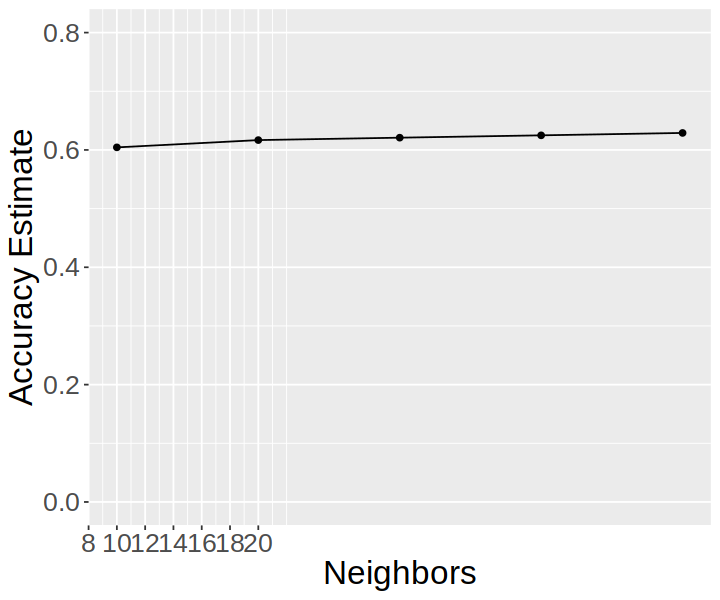

In [52]:
accuracy <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.0, 0.8))

cross_val_plot 

unique notes:
─────────────────────────────────────────────────────────────
Error in `mutate()`:
ℹ In argument: `.row = orig_rows`.
Caused by error:
! `.row` must be size 7666 or 1, not 8240.
─────────────────────────────────────────────────────────────
Error in `mutate()`:
ℹ In argument: `.row = orig_rows`.
Caused by error:
! `.row` must be size 7656 or 1, not 8240.
─────────────────────────────────────────────────────────────
Error in `mutate()`:
ℹ In argument: `.row = orig_rows`.
Caused by error:
! `.row` must be size 7678 or 1, not 8240.
─────────────────────────────────────────────────────────────
Error in `mutate()`:
ℹ In argument: `.row = orig_rows`.
Caused by error:
! `.row` must be size 7667 or 1, not 8240.
─────────────────────────────────────────────────────────────
Error in `mutate()`:
ℹ In argument: `.row = orig_rows`.
Caused by error:
! `.row` must be size 7668 or 1, not 8240.


In [ ]:
tennis_recipe <- recipe(status ~ rank_points + rank + ace, 
                        data = tennis_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [ ]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

In [ ]:
knn_fit <- workflow() |>
  add_recipe(tennis_recipe) |>
  add_model(knn_spec) |>
  fit(data = tennis_train)

knn_fit

In [ ]:
new_observation <- tibble(rank = 48, rank_points = 1500, ace = 10)
prediction <- predict(knn_fit, new_observation)

prediction

In [ ]:
prediction <- predict(knn_fit, tennis_test)

In [1]:
tennis_vfold <- vfold_cv(tennis_train, v = 10, strata = status)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(tennis_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = tennis_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies


ERROR: Error in vfold_cv(tennis_train, v = 10, strata = status): could not find function "vfold_cv"


In [ ]:
rank_points_double<- mutate(tennis_train, rank_points= as.numeric(rank_points))
double_graph<- mutate(rank_points_double, rank= as.numeric(rank))
double_graph<- mutate(double_graph, ace= as.numeric(ace))
head(double_graph)

## **Preliminary exploratory data analysis**

    Our basic tables summarizes the average number of aces, rank points and ranking per the status of winning and losing a game. We can use these summary tables to visualize this in a simple bar graph. These visualization shows that the average number of aces and rank points are higher for winning games than losing. This tells us that a higher number of average aces, as well as higher rank points can be used to predict a winning tennis game. Surprisingly, we noticed that average ranking of a player is higher for losing games rather than winning. Further analysis needs to be done in order to explore this seemingly contradictory result. That being said, we will use ace, rank points, and player ranking as a predictor variable when creating our classification model. 
    


In [ ]:
ace_tbl<- double_graph|> 
            group_by(status)|>
            summarize( average_aces = mean(ace, na.rm= TRUE))

ace_tbl

ace_bar<- ggplot(ace_tbl, aes(x= status, y = average_aces, fill=status)) + 
    geom_bar(stat="identity") +
    labs(x = "Winner or Loser", y = "Average Number of Aces", fill = "Winner or Loser") +
    ggtitle("Average Number of Aces in Winning and Losing Matches")

ace_bar



In [ ]:
ranking_points_data <- double_graph|>
    group_by(status) |>
    summarize( average_rank_points = mean(rank_points, na.rm = TRUE))

ranking_points_data |> 

ggplot(aes(x=status, y =average_rank_points, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Rank Points of Player", fill = "Win or Loss") + 
    ggtitle("Average Rank Points of Winners and Losers of Tennis Matches")

In [ ]:
ranking_data <- double_graph|>
    group_by(status) |>
    summarize(average_rank = mean(rank, na.rm = TRUE))

ranking_data |> 
ggplot(aes(x=status, y =average_rank, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Rank of Player", fill = "Win or Loss") + 
    ggtitle("Average Rank of Winners and Losers of Tennis Matches")

## **Methods** 

    We believe that a tennis player's rank points, rank, and number of aces will have an impact on a player's wins and losses. So after combining the data from previous years, we mainly choose aces, rank points and rank as explanatory variables. We also choose status as a response variable.
    
    In order to improve the accuracy of our classification, we decided to use a KNN classification model. We will split the organized data into 75% training data and 25% testing data. This will randomly extract the data without the influence of sorting and stratify the data by status label so that status has the same proportion in the training and testing sets. Next we'll pre-process the data, making sure that our test data doesn't affect any aspect of the model training. We then can create our K-nearest neighbor classifier into the workflow to make our prediction of status. Additionally, in order to avoid bias due to random selection, we will further split our training data into validation and training sets in order to cross-validate. We will also fine-tune our model by testing multiple K values and selecting the one with the highest accuracy by plotting K against accuracy for multiple K values. Finally, we will visualize the data by constructing multiple scatterplots, classifying values by distance to the nearest neighbor, which should predict status with high recall and precision. 



## **Expected outcomes and significance**

    We expect to find that predictors such as aces and rank points to have a significant impact on the probability of winning. This could be because the players that are more likely to win tend to have more aces. Aces are also a good indicator of a significant skill gap between players, as they are single round victories that are determined by the server. Therefore, players with more aces should theoretically be more skilled than those who have less, predicting a win. Additionally, players that have higher rank points are more likely to win a game, as rank points are a direct quantitative measure of skill. 
    
    Some potential outcomes of our model could be its usage by tennis organizations and coaches, who could analyze these attributes in players in order to predict certain players' success rates in the sport. Furthermore, tennis players themselves could use this data for self-improvement. For example, if a higher number of aces is a predictor of winning, players may choose to focus a larger portion of their training on improving their ability to ace. 
    
    An additional question we may have is if a player's age affects the relationship between aces, rankings, and rank points and their performance? Do these predictors have different effects on players when they are younger vs older? Age is a potentially important variable that could be useful in our model. Additionally, there could be other predictors of winning and losing matches that we have not covered in our proposal. What other variables can be used to predict a win or a loss in tennis matches? 

    